In [1]:
using PyPlot;
using SpecialFunctions;
include("complex_roots.jl");
include("spectrum.jl");

┌ Info: Recompiling stale cache file /home/joris/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1190


In [2]:
R = 2; rectangle = [-R,0.001,-R,R];

<h1>General potentials</h1>

In [3]:
β = 2
U(x)=(1+x^2)^(β/2)/β-1/β;
dUdx(x)=x*(1+x^2)^(β/2-1);

In [4]:
(psi,dpsidz)=construct_ψ(U,dUdx);

In [8]:
maxevals = 10^4

10000

In [13]:
integrand_plus(z::Complex) = - dpsidz(z)/(1-psi(z));
integrand_minus(z::Complex) = dpsidz(z)/(1+psi(z));

In [16]:
roots_plus = qz40(integrand_plus,rectangle,true,maxevals)

Number of rectangles: 1
Number of roots: 5
Number of rectangles: 4
Number of rectangles: 4
Number of rectangles: 4


5-element Array{Complex,1}:
     -1.539403216043573 - 1.902929724231753im    
    -0.9579954288082321 - 1.4081797090760637im   
    -1.5394032160436129 + 1.9029297242317942im   
 -2.752394594656779e-14 - 7.341780389711618e-15im
    -0.9579954288081849 + 1.4081797090760626im   

In [17]:
roots_minus = qz40(integrand_minus,rectangle,true,maxevals)

Number of rectangles: 1
Number of roots: 4
Number of rectangles: 4


4-element Array{Complex,1}:
 -1.2661624294757716 - 1.6675695587427692im
 -0.4256652293470981 - 1.0229524328461115im
 -0.4256652293470777 + 1.0229524328461455im
  -1.266162429475764 + 1.6675695587427328im

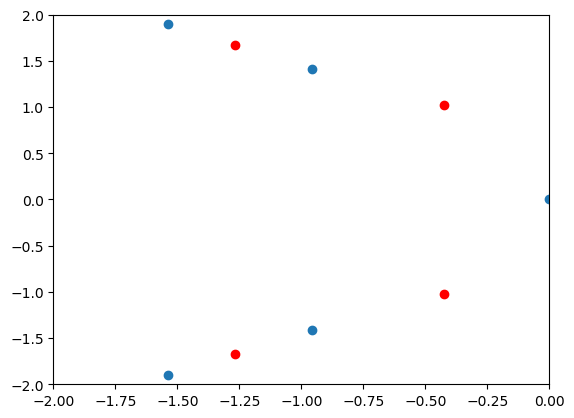

In [18]:
scatter(real(roots_plus),imag(roots_plus));
scatter(real(roots_minus),imag(roots_minus),c="r");
xlim(-R,0);
ylim(-R,R);
savefig("spectrum-beta-$(β)-maxevals-$(maxevals).pdf",format="pdf")

# Direct numerical computation of integrand in the Gaussian case

In [5]:
Zplus(gamma::Complex) = exp(2 * gamma^2.0) * (2 * pi)^(.5)*gamma*erfc(sqrt(2)*gamma);
Zmin(gamma::Complex) = 2 - exp(2 * gamma^2.0) * (2 * pi)^(.5)*gamma*erfc(sqrt(2)*gamma);

In [6]:
integrand_plus(gamma::Complex) = 1/gamma + 4 * gamma - 2 * exp(-2*gamma^2)*sqrt(2/pi)/erfc(sqrt(2)*gamma);
integrand_minus(gamma::Complex) = 1/gamma + 4 * gamma + (2 + 4 * gamma^2)/(-2*gamma + exp(2*gamma^2)*sqrt(2*pi)*gamma^2*erfc(sqrt(2)*gamma));

In [9]:
roots_plus = qz40(integrand_plus,rectangle,true,maxevals)

Number of rectangles: 1
Number of roots: 5
Number of rectangles: 4
Number of rectangles: 8
Number of rectangles: 4


5-element Array{Complex,1}:
 9.583767741345689e-17 + 1.1052220450723647e-17im
   -0.9579954288082124 + 1.4081797090760015im    
   -1.5394032160435887 + 1.902929724231748im     
   -1.5394032160435933 - 1.9029297242317533im    
   -0.9579954288082102 - 1.4081797090759962im    

In [10]:
roots_minus = qz40(integrand_minus,rectangle,true,maxevals)

Number of rectangles: 1
Number of roots: 4
Number of rectangles: 4
Number of rectangles: 8
Number of rectangles: 4


4-element Array{Complex,1}:
 -0.42566522934602785 + 1.022952432845314im 
  -1.2661624294766947 + 1.6675695587434711im
  -1.2661624294766929 - 1.6675695587434713im
  -0.4256652293460278 - 1.0229524328453123im

In [11]:
roots_plus = qz40(integrand_plus,rectangle,true,10^5)

Number of rectangles: 1
Number of roots: 5
Number of rectangles: 4
Number of rectangles: 4
Number of rectangles: 4


5-element Array{Complex,1}:
     -1.5394032160435915 - 1.902929724231751im     
     -0.9579954288082109 + 1.4081797090759984im    
     -1.5394032160435913 + 1.9029297242317513im    
     -0.9579954288082119 - 1.4081797090759973im    
 -1.6423892935204945e-16 - 1.2344665902338325e-16im

In [12]:
roots_minus = qz40(integrand_minus,rectangle,true,10^5)

Number of rectangles: 1
Number of roots: 4
Number of rectangles: 4
Number of rectangles: 4
Number of rectangles: 4
Number of rectangles: 4


4-element Array{Complex,1}:
  -1.2661624294766962 + 1.6675695587434705im
  -0.4256652293460295 + 1.0229524328453152im
   -1.266162429476694 - 1.6675695587434682im
 -0.42566522934602835 - 1.0229524328453132im

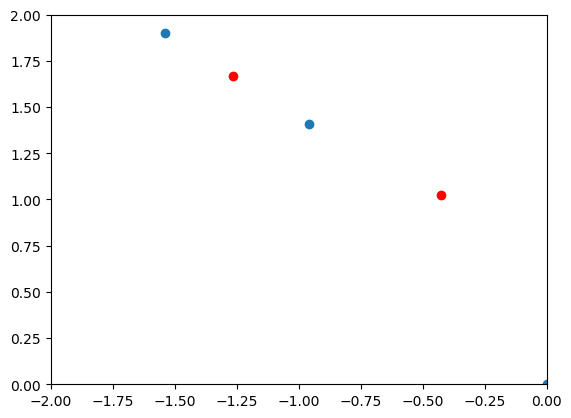

(0, 2.0)

In [13]:
scatter(real(roots_plus),imag(roots_plus))
scatter(real(roots_minus),imag(roots_minus),c="r")
xlim(-R,0)
ylim(0,R)
# savefig("spectrum-gaussian-2.pdf",format="pdf")

# Approximation of the roots (Gaussian case)

In [14]:
dlogZplus_appr_dgamma(gamma) = (sqrt(2*pi)*exp(2 * gamma^2) + 4 *sqrt(2*pi)*gamma^2*exp(2 * gamma^2))/(sqrt(2*pi)*gamma*exp(2*gamma^2)+1/2)

dlogZplus_appr_dgamma (generic function with 1 method)

In [15]:
dlogZminus_appr_dgamma(gamma) = (sqrt(2*pi)*exp(2 * gamma^2) + 4 *sqrt(2*pi)*gamma^2*exp(2 * gamma^2))/(sqrt(2*pi)*gamma*exp(2*gamma^2)-1/2)

dlogZminus_appr_dgamma (generic function with 1 method)

In [16]:
roots_plus_appr = qz40(dlogZplus_appr_dgamma,rectangle)

3-element Array{Complex,1}:
   -1.535869856410733 + 1.90043379759853im     
 -0.18611944901780922 + 3.589167609290427e-16im
  -0.9464563966700834 + 1.4016267133933225im   

In [17]:
roots_minus_appr = qz40(dlogZminus_appr_dgamma,rectangle)

2-element Array{Complex,1}:
 -0.47509846339374673 + 1.0501296624546987im
  -1.2718034369347988 + 1.6717100350860312im

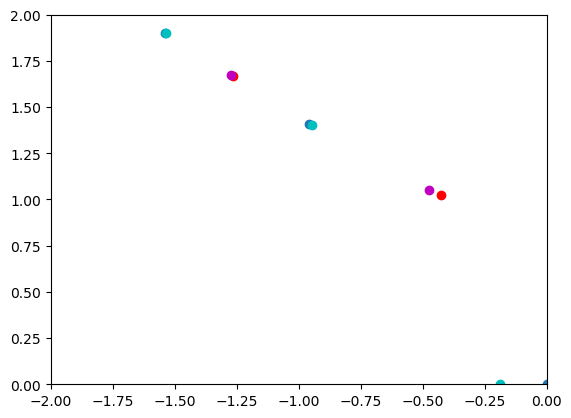

(0, 2.0)

In [18]:
scatter(real(roots_plus),imag(roots_plus))
scatter(real(roots_minus),imag(roots_minus),c="r")
scatter(real(roots_plus_appr),imag(roots_plus_appr),c="c")
scatter(real(roots_minus_appr),imag(roots_minus_appr),c="m")
xlim(-R,0)
ylim(0,R)
# savefig("spectrum-gaussian-2.pdf",format="pdf")